# Basic Data Handling in PyTorch

PyTorch is a Deep Learning library that provides all the needed routines for constructing neura networks and training them by using fancy optimization routines. This highly facilitates the application of Deep Learning-based methods.

### Tensors vs Numpy Arrays
The datatype that PyTorch uses is tensors. Tensors can be thought of numpy.arrays and typically, there is a special structure for the dimensions of the tensors. 
Usually, a tensor has the following shape:

(mb,nch,N1,N2,N3,....)

The first axis is the so-called mini-batch axis, along this axis one stacks different samples, i.e.\ different images, different vectors etc.
The second axis is the channel-axis. This axis can be used for example for RGB-images of also for complex-valued images, where we separate the real and the imaginary parts in two different channels.
N1, N2, N3, ... are arbitrary dimensions which you can use depending on your problem. 

Examples:
- (1,2,160,160,30) could correspond to a complex-valued 3D volume
- (100,3,8,8) could correspond to 100 RGB patches of shape 8x8

Important:
Note that, although (1,2,160,160,30) is only one sample, we cannot neglect the 0-th dimension. Otherwise, the interpretation of the tensor would change. (2,160,160,30) corresponds to two samples of shape 160x30 with 160 channels.

In [15]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from tutorial1_data_driven_reg_methods.utils.helper_funcs import cine_cartesian_mask, cplx_torch2np, cplx_np2torch

In [16]:
#load some toy data
xf = np.load('tutorial1_data_driven_reg_methods/toy_data/xf.npy')
print(xf.shape)
print(xf.dtype)

(128, 128, 20)
complex128


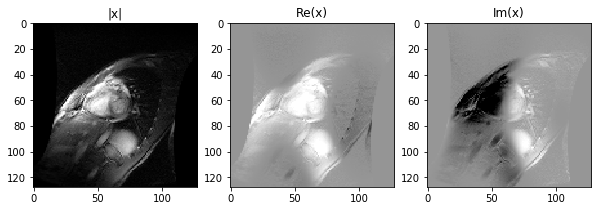

In [20]:
#diplay the image; the magnitude, the real part and the imaginary part
fig,ax = plt.subplots(1,3,figsize=(5*2,1*5))
arrs_list = [np.abs(xf),np.real(xf),np.imag(xf)]
names_list = ['|x|', 'Re(x)', 'Im(x)']
kt=9
for k in range(3):
    if k==0:
       clim = [0,400]
    else:
        clim=[-200,200]
    ax[k].imshow(arrs_list[k][:,:,kt], cmap=plt.cm.Greys_r, clim=clim)
    ax[k].set_title(names_list[k])

In [18]:
#convert it to a complex-valued tensor by separating the real and imaginary part, don't forget to unsqueeze to have
#1 as the leading dimension
xf_tensor = torch.stack([torch.tensor(np.real(xf)),
                       torch.tensor(np.imag(xf))],
                      dim=0).unsqueeze(0)
print(xf_tensor.shape)

torch.Size([1, 2, 128, 128, 20])


In [13]:
#reconvert the image to a numpy array
xf_np = xf_tensor.squeeze(0).detach().numpy()
xf_np = xf_np[0,...] + 1j*xf_np[1,...]

We can also use the following functions which can be found in the repository.

In [14]:
#syntax: cplx_np2torch(x, dim) will reserve the "dim" axis for the real and imaginary part and stack them along it
#cplx_torch2np(x,dim) recombines the real-valued tensor to a complex-valued numpy array by selecting the axis in "dim"
#as the one that contains the real and imaginary parts
xf_tensor = cplx_np2torch(xf,0).unsqueeze(0)
print(xf_tensor.shape)

#first squeeze to get rid of 0-th dimension -->(2,128,128,20) --> 0th axis contains re/img
xf_np = cplx_torch2np(xf_tensor.squeeze(0),0)
print(xf_np.shape)

torch.Size([1, 2, 128, 128, 20])
(128, 128, 20)
